<a href="https://colab.research.google.com/github/Diego875621/Data_Science/blob/main/Credit%20Risk%20Analysis/Credit_risk_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align=center>
<img src="https://github.com/Diego875621/Data_Science/blob/main/Credit%20Risk%20Analysis/loan-financial-application-form-concept.jpg?raw=true" width="50%"></p>
<p align=center> source: Freepik

# **Introduction - Default and credit risk**

Would you lend money to a person who is unreliable or has a bad reputation? Probably no one wants to do that, especially banks. But how do you know which people banks should lend money to or raise the credit card limit?

The bank may deny credit to a person who is perfectly responsible or the opposite, may approve a loan to a person who will never pay back. Typically, credit risk refers to the lender's risk of not receiving the principal and interest due, causing losses in cash flow and increasing collection expenses.

When a person does not honor their financial commitment, it falls into the default category. In other words, the borrower fails to pay the loan, card invoice, or honor his contractual obligations. The probability of a certain person failing to pay back the loan is called the person's *default risk* and determining it is very important.

But the process of sifting a person who is likely to default from a person who will honor their debts is not a really easy job. Actually, it is pretty hard, and that's why banks and other financial companies (like investment companies and insurance companies) invest thousands of dollars in technologies for credit risk. The use of Data Science and Machine Learning are examples of those technologies which are growing more and more, especially in *credit risk modeling*.

The process of using personal data to estimate how likely a person will pay back a loan o not is called credit risk modeling. According to [Investopedia](https://www.investopedia.com/terms/c/creditrisk.asp#:~:text=Credit%20risks%20are%20calculated%20based,loan's%20conditions%2C%20and%20associated%20collateral.) credit risk is the risk that a lender has if the borrower defaults, and is calculated from the borrower's overall capacity to repay the loan and is usually based on 5 criteria of the borrower: credit history, repayment capacity, capital, the terms of the loan, and associated collateral. Usually, the higher the risk, the more lenders will demand higher interest rates.

This dataset was obtained from competition from Nubank, which is a Brazilian digital bank that is investing heavily in data science to assist in credit risk analysis. So the *main objective* of this analysis will estimate which customers are more likely to default.

# **Feature Dictionary**
risk_rate: risk rate of the customer

last_amount_borrowed: last amount the customer got  borrowed

last_amount_borrowed_in_months: last amount in the month the customer got borrowed

credit_limit: customer credit limit

reason: Reason why the customer was default

income: customer income

---

facebook_profile: If the customer has a facebook profile

state: customer state

zip: customer zip code

channel: bank channel

job_name: customer job

real_state: probably the customer number of properties

ok_since:  probably if the client was ok with banks since

n_bankruptcies: how many times the customer went bankruptcy

n_defaulted_loans: how many defaulted loans the customer had

n_issues: number of issues

application_time_applied: response time to the customer's request.

application_time_in_funnel: application time in the bank funnel

email: customer email

---

external_data_provider_credit_checks_last_2_year: customer credit checks last 2 year (from external data)

external_data_provider_credit_checks_last_month: customer credit checks in the last month (from external data)

external_data_provider_credit_checks_last_year: customer credit checks in the last year (from external data)

external_data_provider_email_seen_before: customer email seen before (from external data)

external_data_provider_first_name: customer first name (from external data)

external_data_provider_fraud_score: customer fraud score (from external data)

---

lat_lon: latitide and longitude

marketing_channel: marketing channel

profile_phone_number: customer phone number

reported_income: customer reported income

shipping_state: customer shipping state

shipping_zip_code: customer shipping zip code

profile_tags: tags associated with the customer

user_agent: customer information about browser and system

target_fraud: probably a target feature for other models about fraud detection


# **Importing Data**

The data that will be used in this analysis is available for download through [this link](http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0). It basically consists of a `csv` file containing 45,000 entries and 43 columns.

This file will be imported into a *DataFrame* structure using the `pandas` library in order to allow its manipulation and analysis. Before importing, let's import or install the necessary libraries.

In [120]:
!pip install lightgbm -q

import lightgbm as lgb

In [121]:
# fast_ml library
!pip install fast_ml --upgrade -q

In [122]:
# fast_ml library
from fast_ml.model_development import train_valid_test_split
from fast_ml.utilities import display_all
from fast_ml import eda

In [123]:
# Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plotly visualization
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [124]:
# Maps
!pip install folium -q
import folium
from folium import plugins

In [125]:
# sklearn models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# XGBoost classifier
from xgboost import XGBClassifier
from xgboost import plot_tree
from xgboost import plot_importance


# Encoding and Scaling
from sklearn.preprocessing import LabelEncoder, StandardScaler

# SimpleImputer to fill nan values
from sklearn.impute import SimpleImputer

# Machine Learning packages
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, cross_val_predict, RandomizedSearchCV
from sklearn.metrics import precision_score, classification_report, accuracy_score, roc_curve, roc_auc_score, ConfusionMatrixDisplay
from sklearn.metrics import log_loss, RocCurveDisplay

from sklearn.decomposition import PCA

# Balance packages
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# import warnings
# warnings.filterwarnings('ignore')

In [126]:
# Raw dataframe
df_raw = pd.read_csv('http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0')

In [127]:
df_raw.head()

ids target_default  \
0  343b7e7b-2cf8-e508-b8fd-0a0285af30aa          False   
1  bc2c7502-bbad-0f8c-39c3-94e881967124          False   
2  669630dd-2e6a-0396-84bf-455e5009c922           True   
3  d235609e-b6cb-0ccc-a329-d4f12e7ebdc1          False   
4  9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b          False   

                    score_1                   score_2  score_3     score_4  \
0  1Rk8w4Ucd5yR3KcqZzLdow==  IOVu8au3ISbo6+zmfnYwMg==    350.0  101.800832   
1  DGCQep2AE5QRkNCshIAlFQ==  SaamrHMo23l/3TwXOWgVzw==    370.0   97.062615   
2  DGCQep2AE5QRkNCshIAlFQ==  Fv28Bz0YRTVAT5kl1bAV6g==    360.0  100.027073   
3  1Rk8w4Ucd5yR3KcqZzLdow==  dCm9hFKfdRm7ej3jW+gyxw==    510.0  101.599485   
4  8k8UDR4Yx0qasAjkGrUZLw==  +CxEO4w7jv3QPI/BQbyqAA==    500.0   98.474289   

    score_5     score_6  risk_rate  last_amount_borrowed  ...  \
0  0.259555  108.427273       0.40              25033.92  ...   
1  0.942655   92.002546       0.24                   NaN  ...   
2  0.351918  112.892453       0.29               7207.92  ...   
3  0.987673   94.902491       0.32                   NaN  ...   
4  0.532539  118.126207       0.18                   NaN  ...   

   external_data_provider_fraud_score  \
0                                 645   
1                                 243   
2                                  65   
3                                 815   
4                                 320   

                                      lat_lon marketing_channel  \
0    (-29.151545708122246, -51.1386461804385)      Invite-email   
1   (-19.687710705798963, -47.94151536525154)  Radio-commercial   
2  (-28.748023890412284, -51.867279334353995)      Waiting-list   
3   (-17.520650158450454, -39.75801139933186)      Waiting-list   
4   (-16.574259446978008, -39.90990074785962)      Invite-email   

   profile_phone_number reported_income shipping_state shipping_zip_code  \
0           514-9840782         57849.0          BR-MT             17528   
1           251-3659293          4902.0          BR-RS             40933   
2           230-6097993        163679.0          BR-RR             50985   
3           261-3543751          1086.0          BR-RN             37825   
4           102-3660162        198618.0          BR-MT             52827   

                                profile_tags  \
0                    {'tags': ['n19', 'n8']}   
1              {'tags': ['n6', 'n7', 'nim']}   
2       {'tags': ['n0', 'n17', 'nim', 'da']}   
3                           {'tags': ['n4']}   
4  {'tags': ['pro+aty', 'n19', 'da', 'b19']}   

                                          user_agent target_fraud  
0  Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...          NaN  
1  Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...          NaN  
2  Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...          NaN  
3  Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...          NaN  
4  Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...          NaN  

[5 rows x 43 columns]

In [128]:
# Dataset size
print('Dataset size: \n')

print('Rows:', df_raw.shape[0])
print('Columns:', df_raw.shape[1])

Dataset size: 

Rows: 45000
Columns: 43


In [129]:
# Dataframe summary
df_summary = eda.df_info(df_raw)
display_all(df_summary)

## Also shows nan values
# percent_missing = df.isnull().sum() * 100 / len(df)
# round(percent_missing.sort_values(ascending=False),2)

data_type data_type_grp  \
ids                                                 object   Categorical   
target_default                                      object   Categorical   
score_1                                             object   Categorical   
score_2                                             object   Categorical   
score_3                                            float64     Numerical   
score_4                                            float64     Numerical   
score_5                                            float64     Numerical   
score_6                                            float64     Numerical   
risk_rate                                          float64     Numerical   
last_amount_borrowed                               float64     Numerical   
last_borrowed_in_months                            float64     Numerical   
credit_limit                                       float64     Numerical   
reason                                              object   Categorical   
income                                             float64     Numerical   
facebook_profile                                    object   Categorical   
state                                               object   Categorical   
zip                                                 object   Categorical   
channel                                             object   Categorical   
job_name                                            object   Categorical   
real_state                                          object   Categorical   
ok_since                                           float64     Numerical   
n_bankruptcies                                     float64     Numerical   
n_defaulted_loans                                  float64     Numerical   
n_accounts                                         float64     Numerical   
n_issues                                           float64     Numerical   
application_time_applied                            object   Categorical   
application_time_in_funnel                           int64     Numerical   
email                                               object   Categorical   
external_data_provider_credit_checks_last_2_year   float64     Numerical   
external_data_provider_credit_checks_last_month      int64     Numerical   
external_data_provider_credit_checks_last_year     float64     Numerical   
external_data_provider_email_seen_before           float64     Numerical   
external_data_provider_first_name                   object   Categorical   
external_data_provider_fraud_score                   int64     Numerical   
lat_lon                                             object   Categorical   
marketing_channel                                   object   Categorical   
profile_phone_number                                object   Categorical   
reported_income                                    float64     Numerical   
shipping_state                                      object   Categorical   
shipping_zip_code                                    int64     Numerical   
profile_tags                                        object   Categorical   
user_agent                                          object   Categorical   
target_fraud                                        object   Categorical   

                                                 num_unique_values  \
ids                                                          45000   
target_default                                                   2   
score_1                                                          7   
score_2                                                         35   
score_3                                                         88   
score_4                                                      45000   
score_5                                                      45000   
score_6                                                      45000   
risk_rate                                                       82   
last

> Size

There are 45000 rows and quite a few columns (43)! Are all those columns useful? Probably not, so we should drop a few columns, for example `ids`.

> Categorical Features

Some features have codified values, for instance, `score_1`, `score_2`, should have numerical values, but instead has a serie of values mischaracterized. We maybe can use label encoding to simplify it, like `job_name`. However, it is difficult to say if these features will be useful.

> Cardinality

We are dealing with a dataset with many features with high cardinality, for instance `shipping_zip_code` has more than 28263 unique values.

> Latitude and longitude

`lat_lon` is the coordinate feature, and is in string format, hence, we should split these into two different columns and change the dtype from string to float.

> Missing Values (Nan)

Many columns have nan values, for example target_fraud has more than 96% of missing values. And othens have a few nan, like `target_default`, let's take it as a hypothesis that the nan values of this feature are False values and fill in with False.

> Datetime 

`application_time_applied`  is the time feature, however, this feaature has an error: some minutes and seconds values are bigger than 59. So, let's focus on the hours.

> Target

The target feature is `target_default`



In [130]:
# Statistical description
round(df_raw.describe().T, 2)

count      mean       std  \
score_3                                           44438.0    347.98    110.43   
score_4                                           45000.0    100.01      3.18   
score_5                                           45000.0      0.50      0.29   
score_6                                           45000.0     99.93     10.02   
risk_rate                                         44438.0      0.30      0.10   
last_amount_borrowed                              15044.0  13782.34   8077.57   
last_borrowed_in_months                           15044.0     41.76     10.25   
credit_limit                                      31200.0  34381.95  36586.98   
income                                            44438.0  71607.39  51858.97   
ok_since                                          18455.0     35.07     21.66   
n_bankruptcies                                    44303.0      0.08      0.27   
n_defaulted_loans                                 44426.0      0.00      0.08   
n_accounts                                        44438.0     10.70      4.59   
n_issues                                          33456.0     11.07      4.60   
application_time_in_funnel                        45000.0    247.54    146.12   
external_data_provider_credit_checks_last_2_year  22372.0      0.00      0.00   
external_data_provider_credit_checks_last_month   45000.0      1.50      1.11   
external_data_provider_credit_checks_last_year    29876.0      0.50      0.50   
external_data_provider_email_seen_before          42767.0     12.53    126.53   
external_data_provider_fraud_score                45000.0    500.40    287.97   
reported_income                                   45000.0       inf       NaN   
shipping_zip_code                                 45000.0  33923.51  12692.41   

                                                       min       25%  \
score_3                                               0.00    270.00   
score_4                                              86.19     97.87   
score_5                                               0.00      0.25   
score_6                                              60.66     93.20   
risk_rate                                             0.00      0.22   
last_amount_borrowed                               1005.18   7519.50   
last_borrowed_in_months                              36.00     36.00   
credit_limit                                          0.00  10000.00   
income                                             4821.18  45010.78   
ok_since                                              0.00     17.00   
n_bankruptcies                                        0.00      0.00   
n_defaulted_loans                                     0.00      0.00   
n_accounts                                            0.00      7.00   
n_issues                                              0.00      8.00   
application_time_in_funnel                            0.00    120.00   
external_data_provider_credit_checks_last_2_year      0.00      0.00   
external_data_provider_credit_checks_last_month       0.00      1.00   
external_data_provider_credit_checks_last_year        0.00      0.00   
external_data_provider_email_seen_before           -999.00     11.00   
external_data_provider_fraud_score                    0.00    252.00   
reported_income                                     403.00  50948.25   
shipping_zip_code                                 12001.00  22937.00   

                                                        50%        75%  \
score_3                                              340.00     420.00   
score_4                                              100.02     102.14   
score_5                                                0.50       0.75   
score_6                                               99.97     106.64   
risk_rate                                              0.29       0.36   
last_amount_borrowed                               12023.46   19220.27   
last_borrowed

The statistic summary reveals that:

- `external_data_provider_email_seen_before` has a minimum value of -999 that should be wrong

- `reported_income` has inf values that should be transformed to nan values.

- There is a great discrepancy in the scales (e.g. `credit_limit` x `score_4`)

- In some features there is a high standard deviation, so it is highly likely to have outliers (e.g. `credit_limit`, `income`)

<p align=center>
<img src="https://github.com/Diego875621/Data_Science/blob/main/Credit%20Risk%20Analysis/credit-score-financial-banking-economy-concept.jpg?raw=true" width="50%"></p>
<p align=center> source: Freepik

# **Data Cleaning**

In this section we will start cleaning the dataset, including: feature enginnering, nan values, and outliers.


## **Feature Enginnering**

First, let's start with the time and coordinate features. As we are focusing on hours, we have to split the original feature `application_time_applied` to harvest only the hours. When we set `expand=True` that means the split will return a set of columns, and from this columns only the hours will be extracted.

In [131]:
# Copy of raw df
df = df_raw.copy()

In [132]:
# Spliting time feature
hours = df['application_time_applied'].str.split(':', expand=True)

# Creating a new feature with only hours
df['reply_hours'] = hours[0]

# Droping raw time feature
df.drop(columns='application_time_applied', inplace=True)

# Converting dtype to integer
df['reply_hours'] = df['reply_hours'].astype(int)

In [133]:
# Mean waiting time
print(f'Mean time to reply to customer answer: {df.reply_hours.mean():.2f} hours')

Mean time to reply to customer answer: 11.57 hours


The company takes about 11-12 hours to reply the customer.

Now let's do the same with the coordinate feature `lat_lon`

In [134]:
# Droping lat_lon na values
df.dropna(subset=['lat_lon'], inplace=True)

In [135]:
# Creating latitude column
df['lat'] = df['lat_lon'].str.split(',').str[0]
df['lat'] = df['lat'].str.replace('(', '').astype(float)

In [136]:
# Creating longitude column
df['lon'] = df['lat_lon'].str.split(',').str[1]
df['lon'] = df['lon'].str.replace(')', '').astype(float)

# Droping old 'lat_lon' columns
df.drop(columns='lat_lon', inplace=True)

Now that the coordinates are correctly divided let's localize the default customers using the latitude (`lat`) and longitude (`lo`). For this, we will use the heatmap from `folium` library

In [137]:
# Map dataframe
df_places = df[['lon', 'lat', 'target_default']].copy()

In [138]:
# Only default cases selected
df_places = df_places[df_places['target_default'] == 1]

In [139]:
fig = px.density_mapbox(df_places, lat='lat', lon='lon', z='target_default', radius=10,
                        center=dict(lat=0, lon=180), zoom=0,
                        mapbox_style="stamen-terrain")

In [140]:
# Map
map = folium.Map(location=[df_places.lat.mean(), df_places.lon.mean()], 
                 zoom_start=5, control_scale=True)

places = df_places[['lat','lon']].to_numpy()

# Plot map
map.add_children(plugins.HeatMap(places, radius=15))

With the heatmap visualization, we can see clusters of default customers in the regions:

1. northeast
2. south and southwest
3. midwest


In [141]:
## For add markers (warning: will require more computing power)
# for index, location_info in df_places.iterrows():
#     folium.Marker([location_info["lat"], location_info["lon"]], popup=location_info["target_default"]).add_to(map)

In [142]:
# df summary
df_summary = eda.df_info(df)
display_all(df_summary)

data_type data_type_grp  \
ids                                                 object   Categorical   
target_default                                      object   Categorical   
score_1                                             object   Categorical   
score_2                                             object   Categorical   
score_3                                            float64     Numerical   
score_4                                            float64     Numerical   
score_5                                            float64     Numerical   
score_6                                            float64     Numerical   
risk_rate                                          float64     Numerical   
last_amount_borrowed                               float64     Numerical   
last_borrowed_in_months                            float64     Numerical   
credit_limit                                       float64     Numerical   
reason                                              object   Categorical   
income                                             float64     Numerical   
facebook_profile                                    object   Categorical   
state                                               object   Categorical   
zip                                                 object   Categorical   
channel                                             object   Categorical   
job_name                                            object   Categorical   
real_state                                          object   Categorical   
ok_since                                           float64     Numerical   
n_bankruptcies                                     float64     Numerical   
n_defaulted_loans                                  float64     Numerical   
n_accounts                                         float64     Numerical   
n_issues                                           float64     Numerical   
application_time_in_funnel                           int64     Numerical   
email                                               object   Categorical   
external_data_provider_credit_checks_last_2_year   float64     Numerical   
external_data_provider_credit_checks_last_month      int64     Numerical   
external_data_provider_credit_checks_last_year     float64     Numerical   
external_data_provider_email_seen_before           float64     Numerical   
external_data_provider_first_name                   object   Categorical   
external_data_provider_fraud_score                   int64     Numerical   
marketing_channel                                   object   Categorical   
profile_phone_number                                object   Categorical   
reported_income                                    float64     Numerical   
shipping_state                                      object   Categorical   
shipping_zip_code                                    int64     Numerical   
profile_tags                                        object   Categorical   
user_agent                                          object   Categorical   
target_fraud                                        object   Categorical   
reply_hours                                          int64     Numerical   
lat                                                float64     Numerical   
lon                                                float64     Numerical   

                                                 num_unique_values  \
ids                                                          43637   
target_default                                                   2   
score_1                                                          7   
score_2                                                         35   
score_3                                                         88   
score_4                                                      43637   
score_5                                                      43637   
score_6                                                      43637  

## **Nan values**

As we saw, we can drop many features:

- a lot of features like `ids`, `shipping_zip_code`, etc., will be dropped as they will be not relevant for the model

- `target_fraud`: has a lot of nan values, and is also a feature for other model
- `external_data_provider_credit_checks_last_2_year`: has only one value, and it is not revelant 
- `lat_lon`: we had split it and substituted for `lat` and `lon`
- `application_time_applied`: it has errors (values > 59) and, similar to the previous case, was switched for `reply_hours`




In [143]:
# Columns
drop = ['ids' , 'user_agent', 'target_fraud', 'ok_since', 
        'external_data_provider_first_name', 'profile_phone_number',
        'external_data_provider_credit_checks_last_2_year', 'channel',
        'state', 'zip', 'profile_tags', 'shipping_zip_code', 'reason', 'job_name']
        
# Dropping
df = df.drop(labels=drop, axis=1)

- The nan values of `target_default` will be dropped. This decision was taken because there is no way to know whether the missing values are default customers. 

In [144]:
# Dropping nan from 'target_default'
df.dropna(subset=['target_default'], inplace=True)

- Following the nan dropping, `target_default` will be encoded into 0 (regular) and 1 (default).

In [145]:
# Encode Categorical Columns
le = LabelEncoder()
df['target_default'] = le.fit_transform(df['target_default'])

- `external_data_provider_email_seen_before` -999.0 value needs to be transformed into nan values

- `reported_income` has inf values that need to be transformed into nan values as well.

In [146]:
# 'external_data_provider_email_seen_before' - -999 to nan
df.loc[df['external_data_provider_email_seen_before'] == -999.0,'external_data_provider_email_seen_before'] = np.nan

In [147]:
# 'reported_income' - inf to nan
df.reported_income.replace(np.inf, np.nan, inplace=True)

- `last_amount_borrowed`, `last_borrowed_in_months`, and `n_issues` nan values will be considered as 0, the most frequent value, that is, most people didn't borrow before.

In [148]:
# Filling nan values with 0
df.last_amount_borrowed.fillna(value = 0, inplace =True)
df.last_borrowed_in_months.fillna(value = 0, inplace =True)
df.n_issues.fillna(value = 0, inplace =True)

To make our work easier, SimpleImputer will be used to fill in the missing values. The numerical variables will be filled with the median of each feature, while the categorical ones will will be filled with the most frequent value.

In [149]:
# Numerical features

# Selecting only numerical features
num_var = df.select_dtypes(exclude='object').columns

# Filling nan with median 
num_imputer = SimpleImputer(strategy='median')
df.loc[:,num_var] = num_imputer.fit_transform(df.loc[:,num_var])

In [150]:
# Categorical features

# Selecting only categorical features
cat_var = df.select_dtypes(include='object').columns

# Filling nan with most frequent value
cat_imputer = SimpleImputer(strategy='most_frequent')
df.loc[:,cat_var] = cat_imputer.fit_transform(df.loc[:,cat_var])

In [151]:
# Nan sum
df.isnull().sum().max()

0

Now all the nan values were filled! Nonetheless, we can still improve some categorical values. It is possible to extract only the company name of `email`, that is, without the .com and also fix the typo of it, and turning to `email_type`. 

In [152]:
# extrating useful part of 'email'
df['email_type'] = df['email'].str.split('.').str[0]

# correcting typos
df.email_type.replace({'hotmaill' : 'hotmail', 'gmaill': 'gmail' }, inplace=True)

# Droping old 'email' column
df.drop(columns='email', inplace=True)

Following the same previous idea, `states` can be reduzed to only states, withouth 'BR' before, becoming `br_state` 

In [153]:
# extrating useful part of 'br_state'
df['br_state'] = df.shipping_state.str.split('-').str[1]

# Droping old 'email' column
df.drop(columns='shipping_state', inplace=True)

Now let's plot the `target_default` distribuition

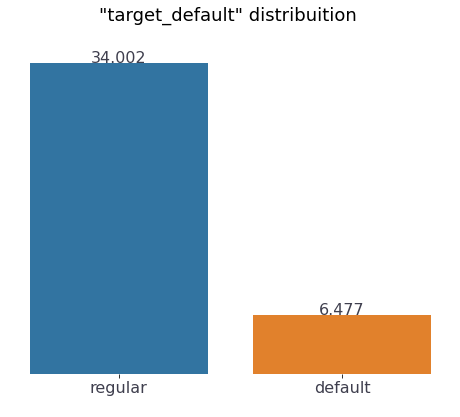

In [154]:
# "target_default" distribuition
f, ax = plt.subplots(figsize=(8,6))

sns.countplot(x=df.target_default, data=df, ax=ax);

plt.title('"target_default" distribuition \n', fontsize=18)
ax.set_xticklabels(['regular', 'default'], fontsize=16, color='#3f3f4e')
ax.set_frame_on(False)
ax.get_yaxis().set_visible(False)
ax.set_xlabel(' ')

# Data Visualization
for hist in ax.patches:
  ax.text(hist.get_x() + hist.get_width() / 2,
          hist.get_height() + 50,
          '{:,}'.format(int(hist.get_height())).replace(',','.'),
          ha = 'center',
          fontsize=16 , color='#3f3f4e')


plt.show()

Here we have a clear imbalance problem of `target_default`, that is, there is much more regular customer than default ones. Ok, that is expected and a good point for the company health, however, we will need to balance this feature before modeling. Otherwise, it is very probable to get overfitting results, that is, the model will predict more of the regular customers than the defaults customers.

## **Outlier treatment**

According to the Pennsylvania State University, outliers can be described as: 

"Any observations that are more than 1.5 IQR below Q1 or more than 1.5 IQR above Q3 are considered outliers." In simpler words, outliers are the values far outside the average value of a group of statistics. The best ways to visualize them are investigating the standard deviation of the feature or plotting a box plot. 

Next, let's look at the statistical distribution and focus on the standard deviation, and also plot the boxplot to identify the outliers, and once identified, we will have to make a choice:

(1) Ignore outliers if they are natural or consistent or not too far from the IQR limits; 

(2) Remove outliers: For example, excluinding all outliers that are 3 times above/bellow the z-score. This option can be dangerous as there is loss of data.

```
from scipy import stats
df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
```

(3) Quantile based capping outliers: in this technique, the outlier is capped at a certain value above, let's suppose, the 99th percentile value or floored at a factor below the 1th percentile value. This will be our choice, because the size of the dataset will be preserved.

(4) It is also possible to transform the data, that is, standardizing the scales, for instance using Standard Scale or Log transformation. This option will be tested on the model building.



In [155]:
# dataframe copy
final_df = df.copy()

The outliers of [`score_3`, `score_6`, `credit_limit`, `reported_income`, `income`, `risk_rate`, `n_accounts`] were capped using the function below in a copy of the dataframe (`final_df`)

In [156]:
# Capping outliers

cols = ['score_3', 'score_6', 'credit_limit', 'reported_income', 'income', 'risk_rate', 'n_accounts']

def cap_data(df):
  
    for col in cols:
        print("capping the column:",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.01,0.99]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df

final_df=cap_data(final_df)

capping the column: score_3
capping the column: score_6
capping the column: credit_limit
capping the column: reported_income
capping the column: income
capping the column: risk_rate
capping the column: n_accounts


In [157]:
print('Clean dataframe entries:', df.shape[0])
print('Final dataframe entries:', final_df.shape[0])

Clean dataframe entries: 40479
Final dataframe entries: 40479


All the previous columns are now capped and no data was lost. Now let's see the statistical summary.

In [158]:
# Statistical describe
round(df[['score_3', 'score_6', 'credit_limit', 'reported_income', 'income', 'risk_rate', 'n_accounts']].describe().T, 2)

count          mean           std      min       25%  \
score_3          40479.0  3.463600e+02  1.100900e+02     0.00    270.00   
score_6          40479.0  9.994000e+01  1.002000e+01    60.66     93.20   
credit_limit     40479.0  3.114099e+04  3.019376e+04     0.00  17358.00   
reported_income  40479.0  9.891471e+12  2.505372e+14   403.00  50736.50   
income           40479.0  7.105768e+04  5.238044e+04  4821.18  44021.16   
risk_rate        40479.0  2.900000e-01  1.000000e-01     0.00      0.22   
n_accounts       40479.0  1.064000e+01  4.590000e+00     0.00      7.00   

                       50%        75%           max  
score_3             340.00     420.00  9.900000e+02  
score_6              99.99     106.65  1.421900e+02  
credit_limit      25200.00   34976.00  4.482690e+05  
reported_income  101353.00  151004.00  6.355500e+15  
income            60043.56   85033.58  5.000028e+06  
risk_rate             0.29       0.36  9.000000e-01  
n_accounts           10.00      13.00  4.900000e+01

In [159]:
# Statistical describe
round(final_df[['score_3', 'score_6', 'credit_limit', 'reported_income', 'income', 'risk_rate', 'n_accounts']].describe().T, 2)

count       mean       std       min       25%        50%  \
score_3          40479.0     346.07    108.14    120.00    270.00     340.00   
score_6          40479.0      99.94      9.84     76.64     93.20      99.99   
credit_limit     40479.0   30607.21  26902.48      0.00  17358.00   25200.00   
reported_income  40479.0  100972.30  57930.88   2214.34  50736.50  101353.00   
income           40479.0   69907.07  37691.27  18018.78  44021.16   60043.56   
risk_rate        40479.0       0.29      0.10      0.10      0.22       0.29   
n_accounts       40479.0      10.61      4.46      3.00      7.00      10.00   

                       75%        max  
score_3             420.00     630.00  
score_6             106.65     122.92  
credit_limit      34976.00  151384.44  
reported_income  151004.00  199515.32  
income            85033.58  225029.29  
risk_rate             0.36       0.57  
n_accounts           13.00      24.00

The meaning and the standard deviation are different from the previous dataframe - That's why outliers can distort results. Now the capped data show us data more representative. Now, let's make some distribution plots.

In [160]:
# Subplots of score_3, score_6, and credit_limit before capping outliers
fig = make_subplots(rows=1, cols=3)

fig.add_trace(go.Box(y = df['score_3'], name='score_3',
                marker_color = 'indianred'))

fig.add_trace(go.Box(y = df['score_6'], name='score_6',
                marker_color = 'lightseagreen'), row=1, col=2)

fig.add_trace(go.Box(y = df['credit_limit'], name='credit_limit',
                marker_color = 'blue'), row=1, col=3)

fig.update_layout(height=600, width=800, title_text="'score_3', 'score_6', and 'credit_limit' before capping outliers")

fig.show()

In [161]:
# Subplots of score_3, score_6, and credit_limit after capping outliers
fig = make_subplots(rows=1, cols=3)

fig.add_trace(go.Violin(y = final_df['score_3'], name='score_3',
                marker_color = 'indianred', box_visible=True))

fig.add_trace(go.Violin(y = final_df['score_6'], name='score_6',
                marker_color = 'lightseagreen', box_visible=True), row=1, col=2)

fig.add_trace(go.Violin(y = final_df['credit_limit'], name='credit_limit',
                marker_color = 'blue', box_visible=True), row=1, col=3)

fig.update_layout(height=600, width=800, title_text="'score_3', 'score_6', and 'credit_limit' after capping outliers")

fig.show()

After the outline cleaning, based on the Interquartile Range(IQR) we can point:

- Most customers have a `score_3` between 270-420 

  - and a `score_4` in a range of 93.19-106.65

- The credit limit of most customers is in the range of 17k-35k, however, there are still a lot of outliers that probably indicate customers with a higher credit score and in this way, lower credit risk.


In [162]:
# Histogram of credit_limit x risk_rate before capping outliers
fig = px.histogram(df, y='credit_limit', x='risk_rate', color='target_default')
fig.update_layout(height=600, width=800, title_text="'credit_limit' x 'risk_rate' before capping outliers")
fig.show()

There is an interesting pattern in the histogram of the sum `credit_limit` x `risk_rate` above that we can harvest some insights.

**Before capping:**

- The regular customers area seems to follow a normal (or Gaussian) distribution, but the default customers point to a skewed distribution.

- It is possible to assume that the default area increases significantly from the range of 0.18 to 0.48. 
 - However, it is important to notice that even though the range below 0.18 seems to be a very low risk rate, there are also defaulting customers in this range.

- There is a decreasing pattern after 0.48 and a plato above 0.53. Probably due to the high risk involved.

In [163]:
# Histogram of credit_limit x risk_rate before after outliers
fig = px.histogram(final_df, y='credit_limit', x='risk_rate', color='target_default')
fig.update_layout(height=600, width=800, title_text="'credit_limit' x 'risk_rate' after capping outliers")
fig.show()

**After capping:**

- Results are similar to the plot above, plus:

 - The previous outliers are now concentrated in 0.1% and 99% of the data. 
 - There are medium peaks of default customers in the end (99% quantile) and in beginning (1% quantile) which means the higher/lower risk customers, and we can there are still default customers at both extremes, low risk and high risk.

In [164]:
# Subplots of income, reported_income, and risk_rate before capping outliers
fig = make_subplots(rows=1, cols=3)

fig.add_trace(go.Box(y = df['income'], name='income',
                marker_color = 'gold'))

fig.add_trace(go.Box(y = df['reported_income'], name='reported_income',
                marker_color = 'blue'), row=1, col=2)

fig.add_trace(go.Box(y = df['risk_rate'], name='risk_rate',
                marker_color = 'coral'), row=1, col=3)

fig.update_layout(height=600, width=800, title_text="'income', 'reported_income', and 'risk_rate' before capping outliers")

fig.show()

In [165]:
# Subplots of income, reported_income, and risk_rate after capping outliers
fig = make_subplots(rows=1, cols=3)

fig.add_trace(go.Violin(y = final_df['income'], name='income',
                marker_color = 'gold', box_visible=True))

fig.add_trace(go.Violin(y = final_df['reported_income'], name='reported_income',
                marker_color = 'blue', box_visible=True), row=1, col=2)

fig.add_trace(go.Violin(y = final_df['risk_rate'], name='risk_rate',
                marker_color = 'coral', box_visible=True), row=1, col=3)

fig.update_layout(height=600, width=800, title_text="'income', 'reported_income', and 'risk_rate' after capping outliers")

fig.show()

In [166]:
# income value_counts
print('"income" (default class) value counts:\n')

df['income'].loc[df["target_default"] > 0].value_counts().head(5)

"income" (default class) value counts:



55019.97    3
60023.12    3
60024.43    2
45013.74    2
40021.50    2
Name: income, dtype: int64

In [167]:
# risk_rate value_counts
print('"risk_rate" (default class) value counts:\n')

df['risk_rate'].loc[df["target_default"] > 0].value_counts().head(5)

"risk_rate" (default class) value counts:



0.31    267
0.29    263
0.30    262
0.33    249
0.28    247
Name: risk_rate, dtype: int64

The outlier treatment show us a drastic change the distribution of `income` and `reported_income` were pratically not usable because of the distortion. Now after the treatment, it is clearly possible to see their distribution. 

In `risk_rate` and `reported_income` there are not outliers anymore.

- `income`: Most people have a income of 44-85k (IQR) while the most frequent income values in the default class was 40-60k. There still outliers here, however, their magnitude was reduced. The distribuition of this feature improved significantly after treating outliers.

- reported_income: Most customers are in the 50-151k (IQR) range, however there is a high distribution between 10-190k. interestingly, this feature has a different distribution than 'income'. As a hypothesis, we can assume that when entering the income information in the app, the user entered a different value than what he actually declared.

- `risk_rate`: Most people have a risk rate of 0.22-0.36 (IQR) while the most frequent risk rate values in the default class was between 0.28-0.31


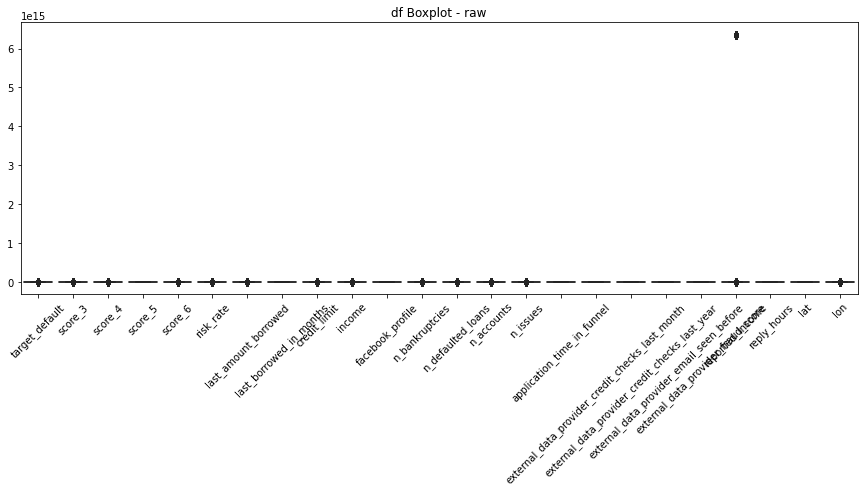

In [168]:
# Boxplot - all features
plt.figure(figsize=(15,5))
sns.boxplot(data = df, palette = 'PuRd')
plt.title('df Boxplot - raw')
plt.xticks(rotation=45)
plt.show()

Box plot of all features before capping: high skewness

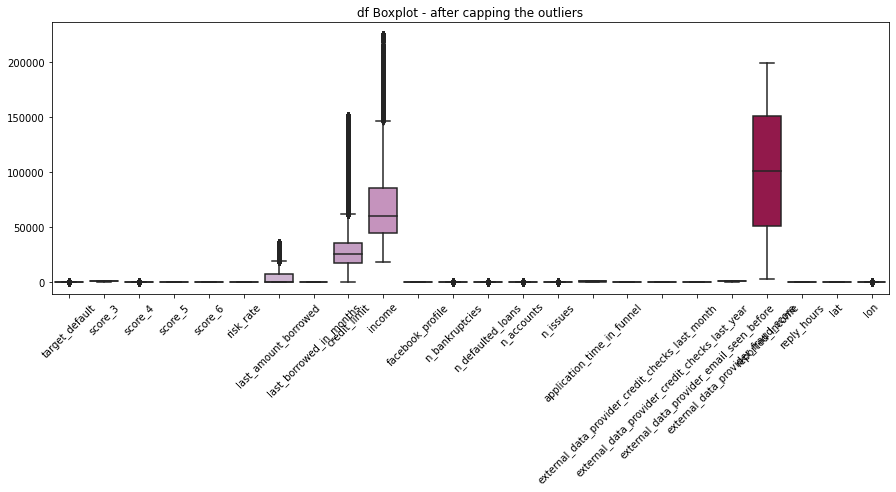

In [169]:
# Boxplot - all features
plt.figure(figsize=(15,5))
sns.boxplot(data = final_df, palette = 'PuRd')
plt.xticks(rotation=90)
plt.title('df Boxplot - after capping the outliers')
plt.xticks(rotation=45)
plt.show()

Box plot of all features after capping: lower skewness - Look at the y axis, you can see that the scales changed, even though we didn't remove any outlier.

# **Data Visualization**

In order to extract possible good insights, we will plot some features with the help of, mainly, boxplots, violinplots, histograms, and scatter plots  Plots will be created using either Plotly or Seaborn libraries.

In [170]:
fig = px.histogram(df, x=df.marketing_channel, color='target_default', title = 'Main marketing channels')
fig.update_xaxes(categoryorder='total descending')

fig.show()

The top three marketing channels are:

1. Website
2. Waiting-list
3. Invite-web

In [171]:
fig = px.histogram(final_df, x=final_df['email_type'].sort_values(ascending=False), 
                   color='target_default', title = 'Most used email company')
fig.show()

Most customers, default and not default, used those emails companies:

1. Gmail
2. Hotmail
3. Outlook
4. spgov

In [172]:
fig = px.histogram(df, x=df.br_state, color=df['target_default'],
                   title = 'Main default states')
fig.update_xaxes(categoryorder='total ascending')

fig.show()

Most states have about 158-210 default customers. The states with most cases of defaulting are:

1. SP: 1089
2. AM: 569
3. GO: 365
4. BA: 347
5. RR: 323
6. MG: 316

Confirming the informations of the heatmap, these states are from: northeast or
southwest or midwest



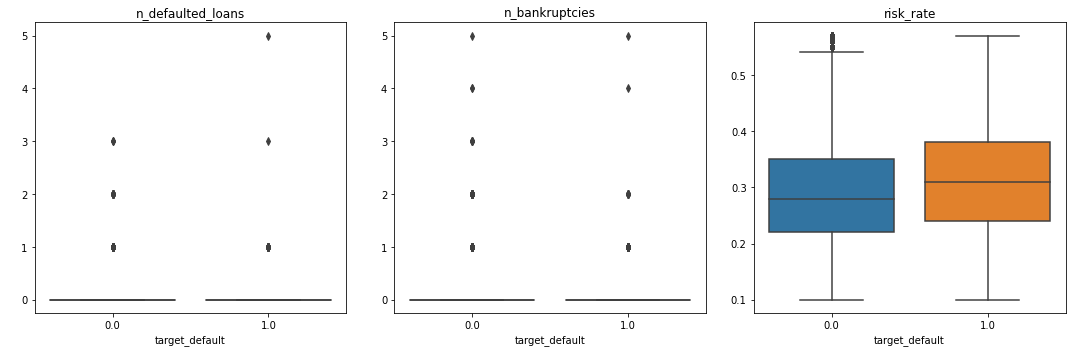

In [173]:
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
sns.boxplot(y='n_defaulted_loans', x=final_df['target_default'], data=final_df, ax=ax[0])
ax[0].set_title('n_defaulted_loans')
ax[0].set_ylabel(' ')

sns.boxplot(y='n_bankruptcies', x=final_df['target_default'], data=final_df, ax=ax[1])
ax[1].set_title('n_bankruptcies')
ax[1].set_ylabel(' ')

sns.boxplot(y='risk_rate', x=final_df['target_default'], data=final_df, ax=ax[2])
ax[2].set_title('risk_rate')
ax[2].set_ylabel(' ')

plt.tight_layout()

The boxplot of `n_defaulted_loans` and `n_bankruptcies` do not reveal much information, just that defaulted or bankrupt people seems to be not so different from regular people. Though `risk_rate` showed a slight range of default people between a score of 0.3- 0.4 of `risk_rate`

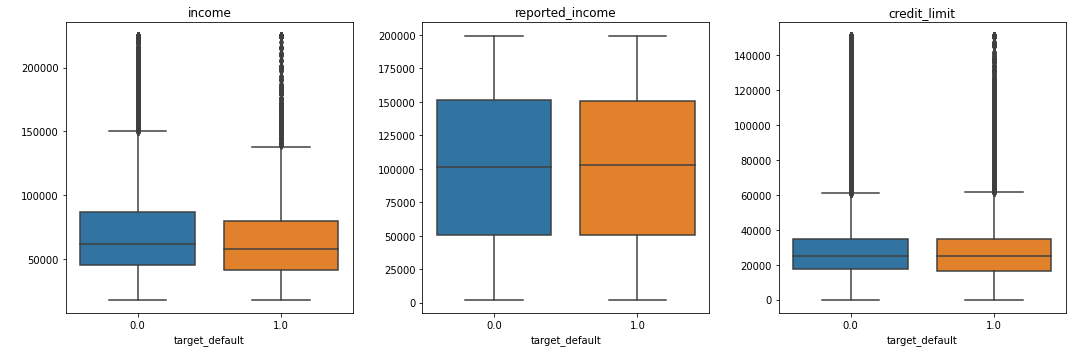

In [174]:
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
sns.boxplot(y='income', x=final_df['target_default'], data=final_df, ax=ax[0])
ax[0].set_title('income')
ax[0].set_ylabel(' ')

sns.boxplot(y='reported_income', x=final_df['target_default'], data=final_df, ax=ax[1])
ax[1].set_title('reported_income')
ax[1].set_ylabel(' ')

sns.boxplot(y='credit_limit', x=final_df['target_default'], data=final_df, ax=ax[2])
ax[2].set_title('credit_limit')
ax[2].set_ylabel(' ')

plt.tight_layout()

The box plot of `income`, `reported_income`, and `credit_limit` against `target_default` do not show much information because the interquartile range between the plots is almost identical. There is only a slight diferrence in `income` because default customers tend to have shorter `income` than regular ones, however, it doesn't seem to be a significant distinction.

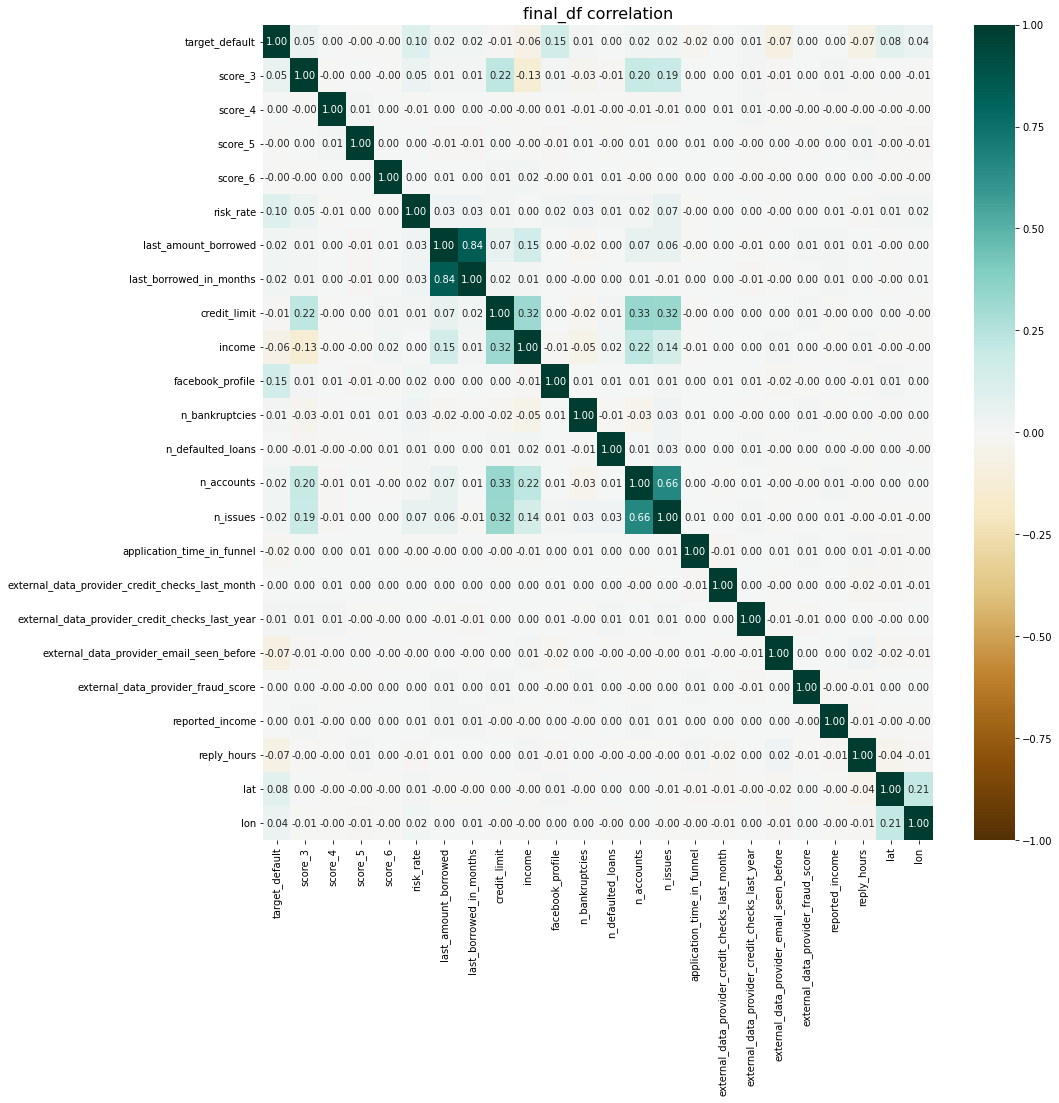

In [175]:
# df correlation

corr = final_df.corr()

f = plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, cmap='BrBG', fmt='.2f')
plt.title('final_df correlation', fontsize=16)
plt.show()

There is no clear correlation between variables, but only a slight correlation between `target_default` and `income`

<p align=center>
<img src="https://github.com/Diego875621/Data_Science/blob/main/Credit%20Risk%20Analysis/No%20woman.jpg?raw=true" width="30%"></p>
<p align=center> source: Freepik

# **Model Development**

Before choosing the appropriate model for our dataset it is necessary some modifications are required. 

The columns `score_1` and `score_2` will be with LabelEnconder. You can ask: why not use one-hot encoding in all categorical features? Because this will increase the dataset dimensionality, shortly, it will increase the number of columns, leading to the curse of dimensionality - that is: your dataset has too many features and data like this is very difficult to optimize. So only these two features were chosen because of their importance.

The other categorical features will be dropped as most models don't support these categorical dtypes. The dataset will be split into train and test sets, `stratify` will be True so all the data can be divided evenly, and `shuffle` will be True as well so the split will be random.

The target feature `target_default` needs to be balanced to achieve good model results. For this step, we will try and see which technique: `Random Under Sampler (RUS)` or `Synthetic Minority Over-sampling Technique (SMOTE)`, will yield better results. RUS will reduce part of the data to equalize while SMOTE equalizes creating synthetic data.

As we saw before, many features have a skewed distribution and plenty of outliers, in order to reduce this we can scale the .data, so `Standard Scaler` will be used.

Finally, to choose the model, we will assay the cross-validation score of some classifiers. The scoring metric will be the `f1_weighted` (the harmonic mean of the precision and recall, weighting over classes) as we are working with a very imbalanced dataset.

In [176]:
# copy
model_df = final_df.copy()

In [177]:
model_df.columns

Index(['target_default', 'score_1', 'score_2', 'score_3', 'score_4', 'score_5',
       'score_6', 'risk_rate', 'last_amount_borrowed',
       'last_borrowed_in_months', 'credit_limit', 'income', 'facebook_profile',
       'real_state', 'n_bankruptcies', 'n_defaulted_loans', 'n_accounts',
       'n_issues', 'application_time_in_funnel',
       'external_data_provider_credit_checks_last_month',
       'external_data_provider_credit_checks_last_year',
       'external_data_provider_email_seen_before',
       'external_data_provider_fraud_score', 'marketing_channel',
       'reported_income', 'reply_hours', 'lat', 'lon', 'email_type',
       'br_state'],
      dtype='object')

In [178]:
## Label Encoding

le = LabelEncoder()

cols = ['score_1', 'score_2']

for col in cols:
  model_df[col] = le.fit_transform(model_df[col])

In [179]:
# # One hot encoding (Not used)
# model_df = pd.get_dummies(model_df, columns=['score_1', 'score_2'])

In [180]:
# Categorical variables
cat_var = model_df.select_dtypes(include='object').columns
cat_var

Index(['real_state', 'marketing_channel', 'email_type', 'br_state'], dtype='object')

In [181]:
drop = ['real_state', 'marketing_channel', 'email_type', 'br_state', 'facebook_profile',
        'application_time_in_funnel', 'email_type',
       'external_data_provider_credit_checks_last_year',
       'external_data_provider_email_seen_before',
       'external_data_provider_fraud_score', 'last_borrowed_in_months', 
        'n_bankruptcies', 'n_defaulted_loans',
        'reply_hours', 'last_amount_borrowed', 'lat', 'lon', 'n_issues']

# Droping features
model_df = model_df.drop(labels=drop, axis=1)

In [182]:
model_df.head()

target_default  score_1  score_2  score_3     score_4   score_5  \
0             0.0        0       10    350.0  101.800832  0.259555   
1             0.0        3       16    370.0   97.062615  0.942655   
2             1.0        3        9    360.0  100.027073  0.351918   
3             0.0        0       21    510.0  101.599485  0.987673   
4             0.0        2        1    500.0   98.474289  0.532539   

      score_6  risk_rate  credit_limit     income  n_accounts  \
0  108.427273       0.40           0.0   65014.12        18.0   
1   92.002546       0.24       39726.0  100018.91        14.0   
2  112.892453       0.29       25200.0   65023.65        10.0   
3   94.902491       0.32       54591.0   68830.01        19.0   
4  118.126207       0.18       25200.0   60011.29        11.0   

   external_data_provider_credit_checks_last_month  reported_income  
0                                              2.0         57849.00  
1                                              1.0          4902.00  
2                                              2.0        163679.00  
3                                              3.0          2214.34  
4                                              2.0        198618.00

In [183]:
# Feature Scaling
num_cols = model_df.drop('target_default',
                         axis=1).select_dtypes(exclude='category').columns
                         
model_df[num_cols] = StandardScaler().fit_transform(model_df[num_cols].values)

Warning! In general it is recommended only to scale the training set, that is, `X_train`. However, this was producing terrible results (for example a really low recall of the default class) with many models.

In [184]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40479 entries, 0 to 44999
Data columns (total 13 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   target_default                                   40479 non-null  float64
 1   score_1                                          40479 non-null  float64
 2   score_2                                          40479 non-null  float64
 3   score_3                                          40479 non-null  float64
 4   score_4                                          40479 non-null  float64
 5   score_5                                          40479 non-null  float64
 6   score_6                                          40479 non-null  float64
 7   risk_rate                                        40479 non-null  float64
 8   credit_limit                                     40479 non-null  float64
 9   income                      

Now the `model_df`, the dataframe to be using in then models have 22 features.

In [185]:
# features x target Split
X = model_df.drop(['target_default'], axis=1)
y = model_df['target_default']

In [186]:
# train x test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True, random_state=42)

In [187]:
# # Feature scaling only X_train (Not used)

# scaler = StandardScaler()
# scaled_features = scaler.fit_transform(X_train.values)
# X_train = pd.DataFrame(scaled_features, index=X_train.index, columns=X_train.columns)

In [188]:
# Balancing with RandomUnderSampler
rus = RandomUnderSampler()
X_res, y_res = rus.fit_resample(X_train, y_train)

In [189]:
# Balancing with SMOTE
sm = SMOTE()
X_sm, y_sm = sm.fit_resample(X_train, y_train)

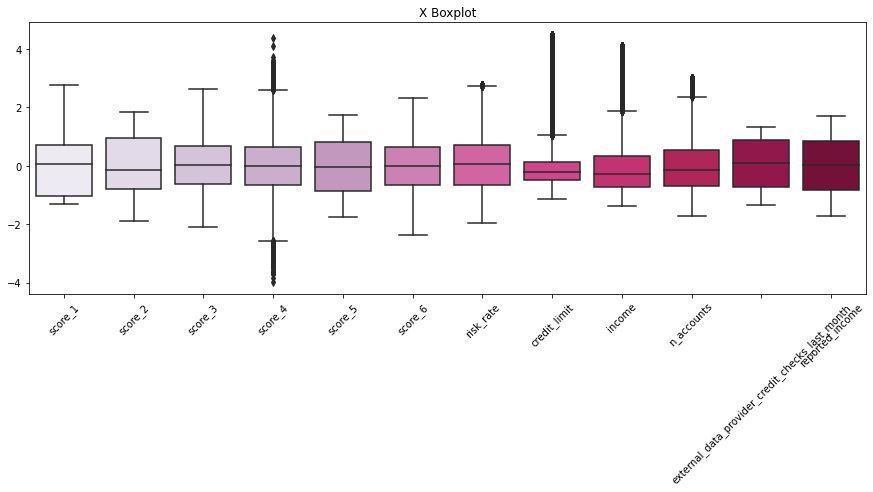

In [190]:
# Boxplot - all features
plt.figure(figsize=(15,5))
sns.boxplot(data = X_sm, palette = 'PuRd')
plt.xticks(rotation=90)
plt.title('X Boxplot')
plt.xticks(rotation=45)
plt.show()

Now data is balanced and scaled. In the next step, we will be looking for the Cross-Validation score of some classifiers (LogisticRegression, XGBoostClassifier, KNeighborsClassifier and RandomForest Classifier)

In [213]:
# Classifiers
classifiers = {
    'LogisticRegression':  LogisticRegression(),
    'XGBoost': XGBClassifier(),
    'KNN': KNeighborsClassifier(),
    'RandomForest': RandomForestClassifier(),
    'GaussianNB': GaussianNB(),
}

In [214]:
# Cross-Validation score (RUS)
print('Cross-Validation balanced dataset (RUS): \n')
for key, classifier in classifiers.items():
  classifier.fit(X_res, y_res)
  training_score = cross_val_score(classifier, X_res, y_res, scoring='f1_weighted')
  print('classifier: ', classifier.__class__.__name__, '-', round(training_score.mean(), 2) * 100, '% f1_weighted')

Cross-Validation balanced dataset (RUS): 

classifier:  LogisticRegression - 56.00000000000001 % f1_weighted
classifier:  XGBClassifier - 62.0 % f1_weighted
classifier:  KNeighborsClassifier - 54.0 % f1_weighted
classifier:  RandomForestClassifier - 60.0 % f1_weighted
classifier:  GaussianNB - 56.99999999999999 % f1_weighted


In [215]:
# Cross-Validation score (SMOTE)
print('Cross-Validation balanced dataset (SMOTE): \n')
for key, classifier in classifiers.items():
  classifier.fit(X_sm, y_sm)
  training_score = cross_val_score(classifier, X_sm, y_sm, scoring='f1_weighted')
  print('classifier: ', classifier.__class__.__name__, '-', round(training_score.mean(), 2) * 100, '% f1_weighted')

Cross-Validation balanced dataset (SMOTE): 

classifier:  LogisticRegression - 56.99999999999999 % f1_weighted
classifier:  XGBClassifier - 82.0 % f1_weighted
classifier:  KNeighborsClassifier - 78.0 % f1_weighted
classifier:  RandomForestClassifier - 90.0 % f1_weighted
classifier:  GaussianNB - 59.0 % f1_weighted


The cross-validation score (`f1_weighted`) of the raw dataset was around 77%, and the RUS balance was about 60% (which actually was worse), but using SMOTE we got around 90% even without tuning hyperparameters. 

The chosen models for this work were XGBoost Classifier (`xgb`) and KNeighbors Classifier (`knn`). These two were chosen instead of RandomForest Classifier because XGBoost is actually a tree ensemble model, that is, is based on the performance of cumulative trees, and the best ones are selected, and also, there are more parameters to modify. While knn was chosen because of its simplicity and high score.

              precision    recall  f1-score   support

         0.0       0.85      0.93      0.89      8501
         1.0       0.32      0.17      0.22      1619

    accuracy                           0.81     10120
   macro avg       0.59      0.55      0.56     10120
weighted avg       0.77      0.81      0.78     10120



Log loss: 0.49
AUC: 0.648




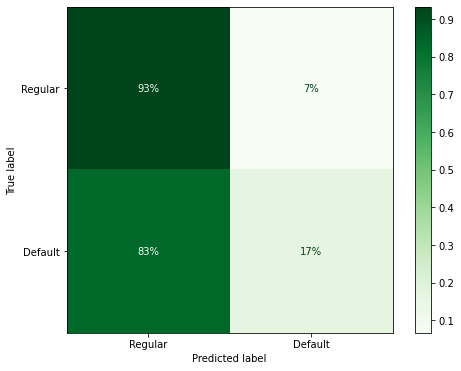

In [217]:
xgb = XGBClassifier()

xgb.fit(X_sm, y_sm)
xgb_pred = xgb.predict(X_test)
xgb_proba = xgb.predict_proba(X_test)

# Classification Report
print(classification_report(y_test, xgb_pred))
print('\n')

# Matriz de Confusão
f, ax = plt.subplots(figsize=(8,6))
ConfusionMatrixDisplay.from_predictions(y_test, xgb_pred, cmap = 'Greens',
                                        display_labels=('Regular', 'Default'),
                                        ax=ax, normalize ='true', values_format= '.0%');

# Log loss (lower is better)
print('Log loss:', round(log_loss(y_test, xgb_proba), 3))

# Area under the curve (AUC)
xgb_auc = roc_auc_score(y_test, xgb_proba[:,1])
print(f'AUC: {xgb_auc:.3f}')
print('\n')

Now that is an example of overfitting! Look at the confusion matrix, the model is predicting with excellence the regular customers but is awfully bad to predict the default customers. In other words, the model just memorized the most common answers instead of learning and generalizing. This means that it is time to tune the hyperparameters.


# **Tuning Hyper-Parameters**

For this step, I will use GridSearchCV to find the best hyper-parameters for the XGBoost Tree. It may take a while as GridSearchCV spends some time looking for the best hyper-parameters using brute force. 

So, to speed up the process, the code will be run and the result will be annotated after that, the code will be transformed into an annotation. As GridSearchCV uses cross-validation, StratifiedKFold is a helpful tool to ensure the k-folds will be split evenly.

**Observation**: Even though I used `f1_weighted` because of the serious imbalance in GridSearchCV, it was not yielding good results for the XGBoost Tree. 

There was a persistent overfitting, so I had to manually tune some of the parameters of the XGBoost Tree. For example, `max_depth` (maximum number of terminal nodes), `gamma`(minimum loss) and `scale_pos_weight` (used in case of high-class imbalance) critically affects the model complexity.

## **XGBoost Classifier**


In [219]:
# StratifiedKFold Cross Validation
kfold = StratifiedKFold(n_splits=5)

In [220]:
# xgb = XGBClassifier(random_state=42)

# param_grid = {
#  'n_estimators':range(0,600,50),
# }

# grid_search = GridSearchCV(xgb, param_grid, scoring="f1_weighted", cv=kfold)
# grid_result = grid_search.fit(X_sm, y_sm)

# # ver resultados
# print(f"Best f1_weighted: {grid_result.best_score_} for {grid_result.best_params_}")

# # Best f1_weighted: 0.8639902103699582 for {'n_estimators': 550}

In [221]:
# xgb = XGBClassifier(n_estimators= 550, random_state=42)

# param_grid = {
#  'max_depth':range(1,8,1),
# }

# grid_search = GridSearchCV(xgb, param_grid, scoring="f1_weighted", cv=kfold)
# grid_result = grid_search.fit(X_sm, y_sm)

# # ver resultados
# print(f"Best f1_weighted: {grid_result.best_score_} for {grid_result.best_params_}")

# # Best f1_weighted: 0.8647665778217947 for {'max_depth': 4}

In [222]:
# xgb = XGBClassifier(n_estimators= 550, max_depth= 4, random_state=42)

# param_grid = {
#  'min_child_weight': range(1,5,1)
# }

# grid_search = GridSearchCV(xgb, param_grid, scoring="f1_weighted", cv=kfold)
# grid_result = grid_search.fit(X_sm, y_sm)

# # Results
# print(f"Best f1_weighted: {grid_result.best_score_} for {grid_result.best_params_}")

# # Best f1_weighted: 0.8647665778217947 for {'min_child_weight': 1}

In [223]:
# xgb = XGBClassifier(n_estimators= 550, max_depth= 4, random_state=42)

# param_grid = {
#  'learning_rate':[0.001, 0.01, 0.1, 1]
# }

# grid_search = GridSearchCV(xgb, param_grid, scoring="f1_weighted", cv=kfold)
# grid_result = grid_search.fit(X_sm, y_sm)

# # Results
# print(f"Best f1_weighted: {grid_result.best_score_} for {grid_result.best_params_}")

# # Best f1_weighted: 0.8647665778217947 for {'learning_rate': 0.1}

In [224]:
# xgb = XGBClassifier(learning_rate=0.1, n_estimators= 550, max_depth= 4, random_state=42)

# param_grid = {
#     'scale_pos_weight': range(1,5,1)
# }

# grid_search = GridSearchCV(xgb, param_grid, scoring="f1_weighted", cv=kfold)
# grid_result = grid_search.fit(X_sm, y_sm)

# # Results
# print(f"Best f1_weighted: {grid_result.best_score_} for {grid_result.best_params_}")

# # Best f1_weighted: 0.8647665778217947 for {'scale_pos_weight': 1}

In [225]:
# xgb = XGBClassifier(learning_rate=0.1, n_estimators= 550, max_depth= 4, random_state=42)

# param_grid = {
#     'gamma': range(1,5,1)
# }

# grid_search = GridSearchCV(xgb, param_grid, scoring="f1_weighted", cv=kfold)
# grid_result = grid_search.fit(X_sm, y_sm)

# # Results
# print(f"Best f1_weighted: {grid_result.best_score_} for {grid_result.best_params_}")

# ## Best f1_weighted: 0.865139662391037 for {'gamma': 2}

In [226]:
# xgb = XGBClassifier(learning_rate=0.1, n_estimators= 550, max_depth= 4, gamma=1, random_state=42)

# param_grid = {
#  'subsample': [0.5, 0.7, 1]
# }

# grid_search = GridSearchCV(xgb, param_grid, scoring="f1_weighted", cv=kfold)
# grid_result = grid_search.fit(X_sm, y_sm)

# # Results
# print(f"Best f1_weighted: {grid_result.best_score_} for {grid_result.best_params_}")

# # Best f1_weighted: 0.8898431526305876 for {'subsample': 1}

In [227]:
# Final xgb model
xgb = XGBClassifier(learning_rate=0.1,
                    n_estimators= 550, 
                    max_depth=1,
                    scale_pos_weight= 4,
                    gamma=2,
                    subsample= 1,
                    random_state=42)

# Fitting model and making prediction
xgb.fit(X_sm, y_sm)
xgb_pred = xgb.predict(X_test)
xgb_proba = xgb.predict_proba(X_test)

              precision    recall  f1-score   support

         0.0       0.94      0.13      0.22      8501
         1.0       0.17      0.95      0.29      1619

    accuracy                           0.26     10120
   macro avg       0.55      0.54      0.26     10120
weighted avg       0.81      0.26      0.23     10120



Log loss: 1.083
AUC: 0.651




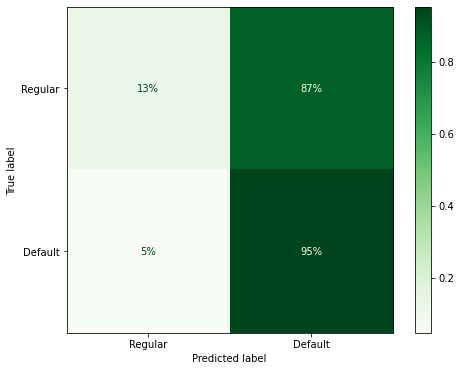

In [228]:
# Classification Report
print(classification_report(y_test, xgb_pred))
print('\n')

# Confusion Matrix
f, ax = plt.subplots(figsize=(8,6))
ConfusionMatrixDisplay.from_predictions(y_test, xgb_pred, cmap = 'Greens',
                                        display_labels=('Regular', 'Default'),
                                        ax=ax, normalize ='true', values_format= '.0%');
# Log loss (lower is better)
print('Log loss:', round(log_loss(y_test, xgb_proba), 3))

# Area under the curve (AUC)
xgb_auc = roc_auc_score(y_test, xgb_proba[:,1])
print(f'AUC: {xgb_auc:.3f}')
print('\n')

Now let's see the results we got for the XGBoost Tree with tuned hyper-parameters. For the default class, we got a recall of 96% and precision of 17%. In other words, let's say that from a group of 100 default people, 96 will be detected as default one, but only 17% of the initial amount will be real default customers.

In summary: the tuned model increased recall while reducing precision, the AUC didn't change, and the log_loss increased.

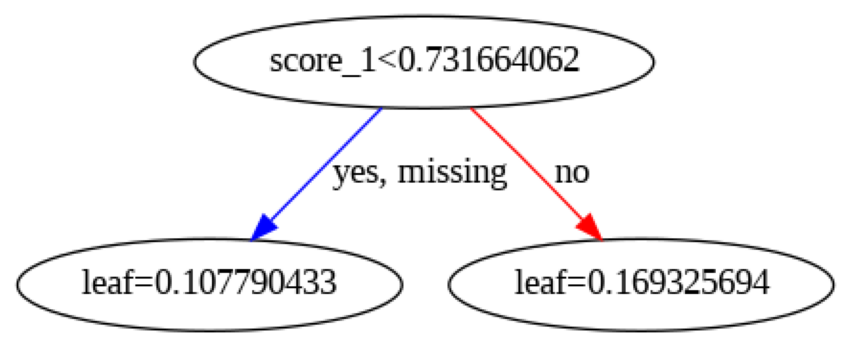

In [229]:
# Decision tree plot
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

fig, ax = plt.subplots(figsize = (15,15))
plot_tree(xgb, ax=ax)
plt.show()

The XGBoost Tree has only one node, that is because we changed the parameters in order to avoid overfitting. The tree tells us `score_1` was the most important parameter for the tree.

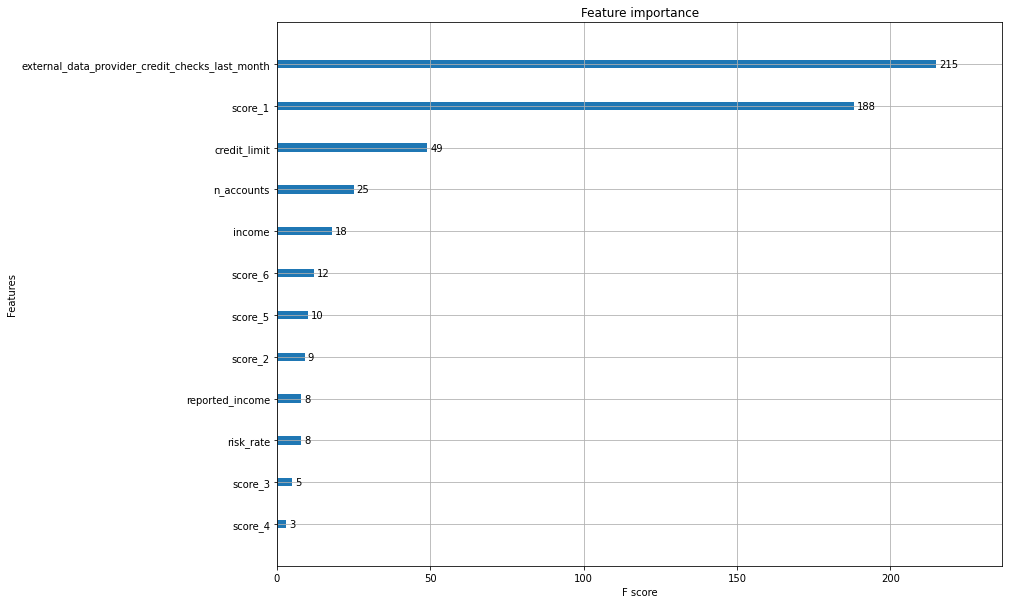

In [230]:
# Feature importance
fig, ax = plt.subplots(figsize = (13,10))
plot_importance(xgb, ax=ax)
plt.show();

The main features for the xgb Feature importance were `external_data_provider_credit_checks_last_month`, `score_1`,  and `credit_limit`.

## KNN - K-Neighbors-Classifier

In [231]:
# # KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_sm, y_sm)
knn_pred = knn.predict(X_test)
knn_proba = knn.predict_proba(X_test)

              precision    recall  f1-score   support

         0.0       0.85      0.60      0.71      8501
         1.0       0.18      0.45      0.26      1619

    accuracy                           0.58     10120
   macro avg       0.52      0.53      0.48     10120
weighted avg       0.74      0.58      0.63     10120



Log loss: 4.685
AUC: 0.535




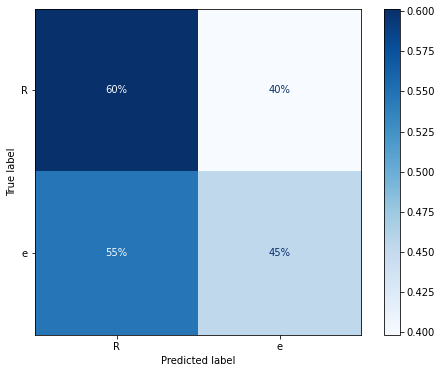

In [232]:
# Classification Report
print(classification_report(y_test, knn_pred))
print('\n')

# Confusion Matrix
f, ax = plt.subplots(figsize=(8,6))
ConfusionMatrixDisplay.from_predictions(y_test, knn_pred, cmap = 'Blues',
                                        display_labels=('Regular, Default'),
                                        ax=ax, normalize ='true', values_format= '.0%');

# Log loss (lower is better)
print('Log loss:', round(log_loss(y_test, knn_proba), 3))

# AUC
knn_auc = roc_auc_score(y_test, knn_proba[:,1])
print(f'AUC: {knn_auc:.3f}')
print('\n')

Here we got a lower recall for the default class and a lower precision, compared to the xgb. However, the knn log_loss increased significantly while the AUC decreased. Hence, overall the xgb performed better for this analysis. 

ROC curve from estimators: 



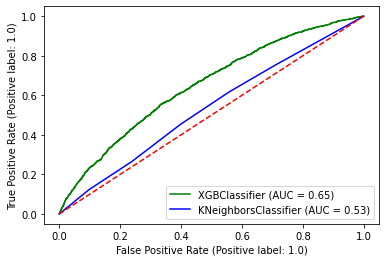

In [233]:
# Plot ROC Curve
print('ROC curve from estimators: \n')

ax = plt.gca()
xgb_auc = RocCurveDisplay.from_estimator(xgb, X_test, y_test, ax=ax, color = 'g')
knn_auc = RocCurveDisplay.from_estimator(knn, X_test, y_test, ax=ax, color = 'b')
ax.plot([0, 1], [0, 1], color = 'r', linestyle = '--')

plt.show()

The `xgb` got a ROC curve slightly better than the `knn`.

<p align=center>
<img src="https://github.com/Diego875621/Data_Science/blob/main/Credit%20Risk%20Analysis/problem-solving-close-up-view-hand-business-woman-stopping-falling-blocks-table-concept-about-taking-responsibility.jpg?raw=true" width="50%"></p>
<p align=center> source: Freepik

# **Summary**


In this work we analyzed the credit risk of a bank dataset, trying to find out patterns between default customers. The initial exploration revealed that the dataset had a lot of features, missing values, outliers, and an unbalanced target, so a cleaning process was required. 

The exploratory data analysis and visualization revealed that most default people were from northeast, south, and midwest, in decreasing order. The main email companies were: Gmail, Hotmail, and Outlook, in decreasing order.

It was difficult to see a correlation between features and target. The box plot of `risk_rate` showed a slight range of default people between a score of 0.3-0.4 of `risk_rate`; most people have a risk rate of 0.22-0.36 while the most frequent risk rate values in the default class were between 0.28-0.31

The box plot of `income` showed that default customers tend to have shorter `income` than regular ones, however, it doesn't seem to be a critical distinction between this dataset; most people have an income of 44-85k while the most frequent income values in the default class were 40-60k.

For the model development, SMOTE was the balancing technique and Standard Scaler was the scaler. The cross-validation score metric was the f1_weighted and the chosen models were XGBoost Classifier and KNeighbors Classifier. The XGBoost Classifier did perform better than the KNeighbors Classifier with better recall and AUC.


# **Conclusion**

These results could be used for screening people and based on their scores, further investigation and decisions can be decided. For example, lenders can deny the loan requisition or could increase interests rate based on customer risk ([A. Jeremy Mahoney - Credit Risk Modeling with Machine Learning](https://towardsdatascience.com/credit-risk-modeling-with-machine-learning-8c8a2657b4c4))

Still, the recall of the default class was lower than 50%, thus some data engineering may be necessary. For example, more data could be gathered and collected, for example, features about: customer age, customer's current employment situation, customer number of children, customer business risk, values of inflation, and the basic interest rate currently.

While current features, like `scores`, could be transformed into binary, for instance, is score bigger than X? Or even normalized in a standard scale of -1 to +1. This would make it easier with regard to the size of the dataset, freeing up computational power and making modeling faster.

In addition, it may be that the use of neural networks can help performance and perhaps even be necessary to achieve better results.



Images:

<a href="https://www.freepik.com/free-photo/credit-score-financial-banking-economy-concept_19140295.htm#query=borrow&position=12&from_view=search&track=sph">Image by rawpixel.com</a> on Freepik

<a href="https://www.freepik.com/free-photo/loan-financial-application-form-concept_17142895.htm#query=borrow&position=47&from_view=search&track=sph">Image by rawpixel.com</a> on Freepik

<a href="https://www.freepik.com/free-photo/problem-solving-close-up-view-hand-business-woman-stopping-falling-blocks-table-concept-about-taking-responsibility_1203375.htm#query=denied&position=28&from_view=search&track=sph">Image by mindandi</a> on Freepik

<a href="https://www.freepik.com/free-vector/young-female-illustration-character-with-no-hand-gesture_21087390.htm#query=denied&position=46&from_view=search&track=sph">Image by syarifahbrit</a> on Freepik

